Naive Bayes model accuracy: 98.85%


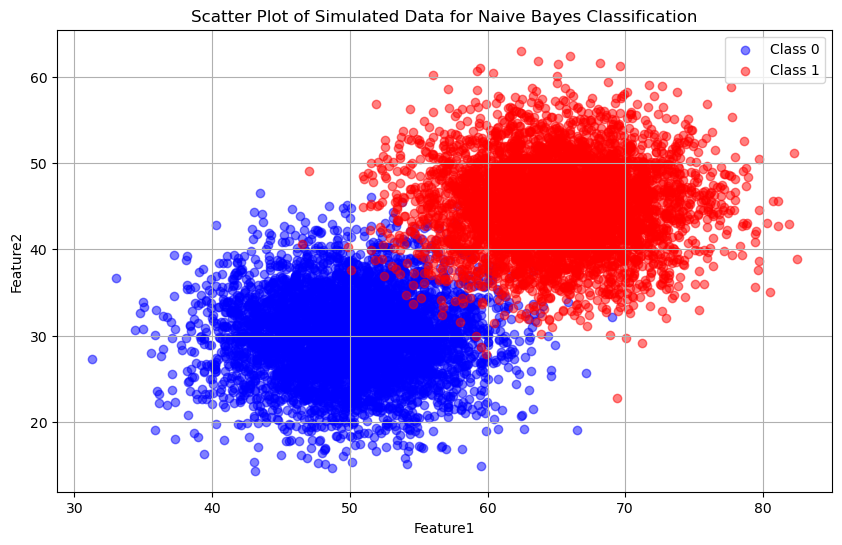

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Parameters for dataset generation
np.random.seed(0)
num_samples_per_class = 5000

# Class 0 (Non-Fraud)
class_0_feature1 = np.random.normal(50, 5, num_samples_per_class)   # mean=50, std=5
class_0_feature2 = np.random.normal(30, 5, num_samples_per_class)   # mean=30, std=5
class_0_labels = np.zeros(num_samples_per_class)

# Class 1 (Fraud)
class_1_feature1 = np.random.normal(65, 5, num_samples_per_class)   # mean=65, std=5
class_1_feature2 = np.random.normal(45, 5, num_samples_per_class)   # mean=45, std=5
class_1_labels = np.ones(num_samples_per_class)

# Combine into a DataFrame
data = pd.DataFrame({
    "Feature1": np.concatenate([class_0_feature1, class_1_feature1]),
    "Feature2": np.concatenate([class_0_feature2, class_1_feature2]),
    "Label": np.concatenate([class_0_labels, class_1_labels])
})

# Split data into training and testing sets
X = data[["Feature1", "Feature2"]].values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate data into classes for training
data_class_0 = X_train[y_train == 0]
data_class_1 = X_train[y_train == 1]

# Calculate prior probabilities
prior_class_0 = len(data_class_0) / len(X_train)
prior_class_1 = len(data_class_1) / len(X_train)

# Calculate means and variances for each feature conditioned on class
mean_class_0 = np.mean(data_class_0, axis=0)
mean_class_1 = np.mean(data_class_1, axis=0)
var_class_0 = np.var(data_class_0, axis=0)
var_class_1 = np.var(data_class_1, axis=0)

# Naive Bayes prediction function
def calculate_gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

def predict_naive_bayes(sample):
    # Calculate likelihoods for Class 0
    likelihood_class_0 = (
        calculate_gaussian_probability(sample[0], mean_class_0[0], var_class_0[0]) *
        calculate_gaussian_probability(sample[1], mean_class_0[1], var_class_0[1])
    )
    
    # Calculate likelihoods for Class 1
    likelihood_class_1 = (
        calculate_gaussian_probability(sample[0], mean_class_1[0], var_class_1[0]) *
        calculate_gaussian_probability(sample[1], mean_class_1[1], var_class_1[1])
    )
    
    # Posterior probabilities
    posterior_class_0 = prior_class_0 * likelihood_class_0
    posterior_class_1 = prior_class_1 * likelihood_class_1
    
    # Predict class with higher posterior probability
    return 0 if posterior_class_0 > posterior_class_1 else 1

# Predicting and calculating accuracy on the test set
y_pred_naive_bayes = [predict_naive_bayes(sample) for sample in X_test]
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes model accuracy: {accuracy_naive_bayes * 100:.2f}%")

# Plot data points (optional for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(data[data["Label"] == 0]["Feature1"], data[data["Label"] == 0]["Feature2"], color='blue', alpha=0.5, label="Class 0")
plt.scatter(data[data["Label"] == 1]["Feature1"], data[data["Label"] == 1]["Feature2"], color='red', alpha=0.5, label="Class 1")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Scatter Plot of Simulated Data for Naive Bayes Classification")
plt.legend()
plt.grid(True)
plt.show()
